In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [2]:
employee_df = pd.read_csv('DATASET_-_NOVA_IMS_-_Human-Resources-Employee-Attrition/HR_DS.csv')
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
employee_df.shape

(1470, 35)

We seem to have little data to work with. We probably cannot divide the data in TRAIN and VALIDATION. Use K-Fold CV.

In [4]:
employee_df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [5]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
employee_df.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

In [7]:
employee_df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no missing values in our dataset.

In [8]:
employee_df[employee_df.duplicated(keep = False)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


No duplicates found!

### Target Distribution

<AxesSubplot:xlabel='Attrition', ylabel='Count'>

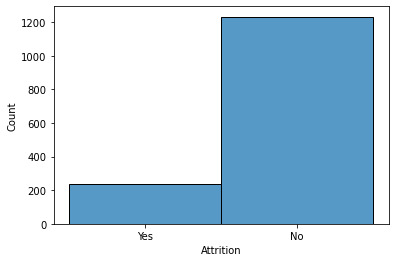

In [9]:
sns.histplot(data = employee_df.Attrition, legend= True)

We have a imbalanced dataset, since most of our observations have a target of 'No'. We must take this into account when using evaluation metrics.

### Numerical Variables

In [10]:
employee_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


EmployeeCount and StandardHours are univariate features and should be dropped as they don't provide relevant information to the problem. 

EmployeeNumber don't seem relevant also, set as index.

In [11]:
employee_df.set_index('EmployeeNumber', inplace= True)
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2


In [12]:
employee_df.drop(columns= ['EmployeeCount', 'StandardHours', 'Over18'], axis = 1, inplace = True)

In [13]:
employee_df.skew()

/var/folders/7w/6pq3hqxj29j64x5wby_mv6r40000gn/T/ipykernel_96398/4017173631.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  employee_df.skew()


Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

NumCompaniesWorked, PerformanceRating, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion seem to be highly skewed and might contain a few outliers.

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Count'>

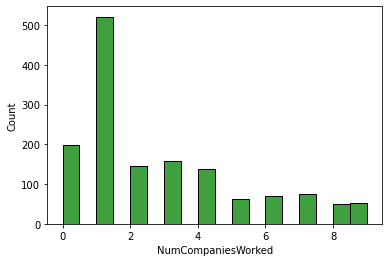

In [14]:
sns.histplot(employee_df.NumCompaniesWorked, color = 'g')

3    1244
4     226
Name: PerformanceRating, dtype: int64


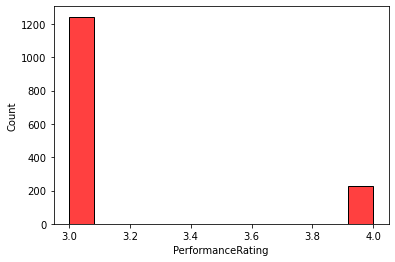

In [15]:
sns.histplot(employee_df.PerformanceRating, color = 'r')
print(employee_df.PerformanceRating.value_counts())

Weird values in Performance Rating, only 3 and 4 values?

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Count'>

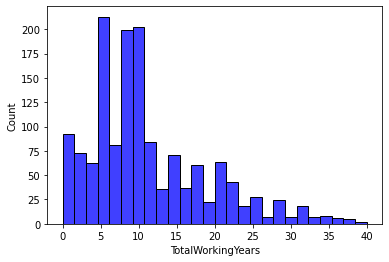

In [16]:
sns.histplot(employee_df.TotalWorkingYears, color = 'b')

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Count'>

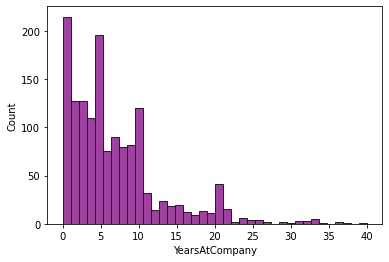

In [17]:
sns.histplot(employee_df.YearsAtCompany, color = 'purple')

<AxesSubplot:ylabel='YearsAtCompany'>

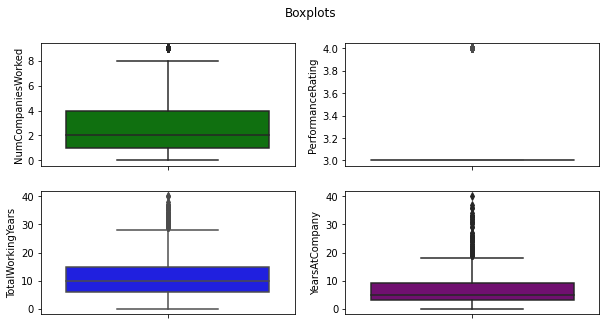

In [18]:
figure, axes = plt.subplots(2, 2, sharex= False, figsize=(10,5))
figure.suptitle('Boxplots')

sns.boxplot(ax= axes[0, 0], data= employee_df, y= 'NumCompaniesWorked', color= 'g')
sns.boxplot(ax= axes[0, 1], data= employee_df, y= 'PerformanceRating', color= 'r')
sns.boxplot(ax= axes[1, 0], data= employee_df, y= 'TotalWorkingYears', color= 'b')
sns.boxplot(ax= axes[1, 1], data= employee_df, y= 'YearsAtCompany', color= 'purple')

<AxesSubplot:>

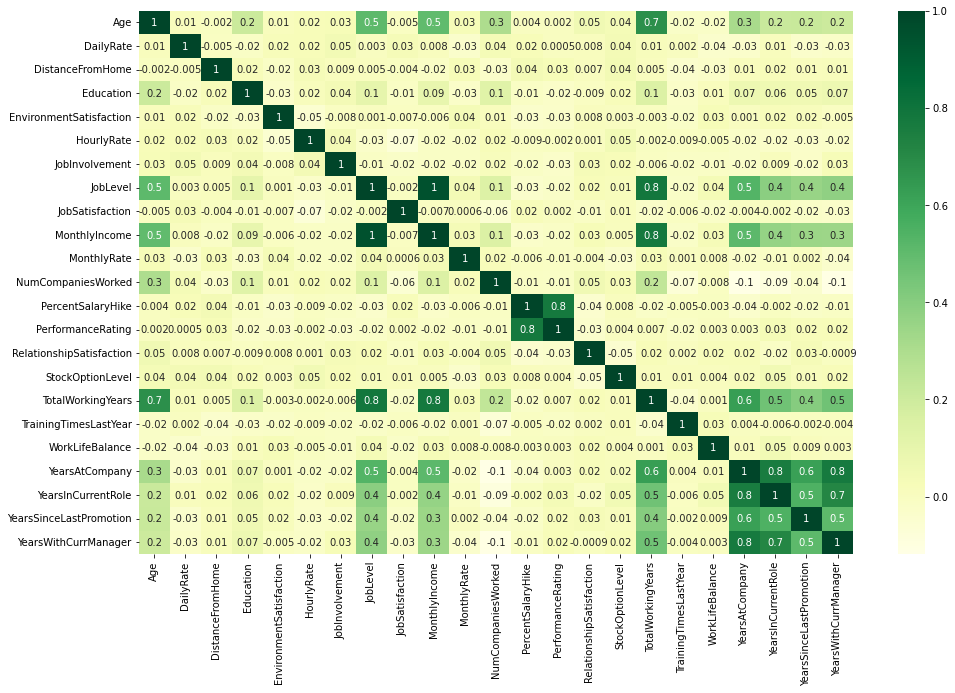

In [19]:
df_corr = employee_df.corr(method = 'pearson')
figure = plt.figure(figsize = (16, 10))
sns.heatmap(df_corr, cmap = 'YlGn',annot = True, fmt = '.1g')

<AxesSubplot:>

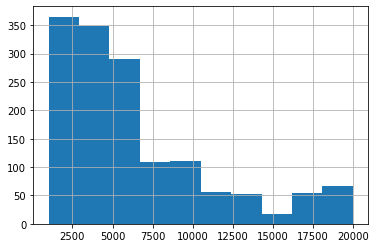

In [20]:
employee_df.MonthlyIncome.hist()

### Cateforical Variables

In [21]:
employee_df.describe(include = ['O']) # incluir as variáveis categóricas no describe

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


No NaN values found in categorical variables.

As seen previously Attrition possesses for the most time the value "No", people tend to travel rarely, do R&D, come from Life Sciences and are Male most of the time.

The most frequent Job Role is Sales Executive, more than half of employees are Married and more than 2/3 don't do overtime.

# Data Pre Processing

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

### Dummify Target Variable

In [23]:
employee_df.Attrition.replace(to_replace= ['Yes', 'No'], value= [1, 0], inplace= True)
employee_df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

### Modify Business Travel column

In [24]:
employee_df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

To simplify the model we won't make any distinction between Travel_Rarely and Non-Travel. 

We will turn them both into 0s and Travel_Frequently into 1s.

In [25]:
employee_df.BusinessTravel.replace(to_replace= ['Travel_Rarely', 'Non-Travel', 'Travel_Frequently'], 
                                   value= [0, 0, 1], inplace= True)
employee_df.BusinessTravel.value_counts()

0    1193
1     277
Name: BusinessTravel, dtype: int64

### Dummify Department feature

In [26]:
enc = OneHotEncoder(dtype= 'int32', handle_unknown= 'error', drop= 'first')
transformed = enc.fit_transform(employee_df[['Department']]).toarray()
transformed

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=int32)

In [27]:
enc.categories_

[array(['Human Resources', 'Research & Development', 'Sales'], dtype=object)]

In [28]:
# use https://datagy.io/sklearn-one-hot-encode/#:~:text=Additional%20Resources-,What%20is%20One%2DHot%20Encoding%3F,column%2C%20it%20receives%20a%201%20.
# for OneHot Encoding features

transformer = make_column_transformer(
    (enc, ['Department']),
    remainder= 'passthrough')

transformed = transformer.fit_transform(employee_df)
transformed_df = pd.DataFrame(
    transformed, 
    columns= transformer.get_feature_names()
)

transformed_df

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,onehotencoder__x0_Research & Development,onehotencoder__x0_Sales,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,41,1,0,1102,1,2,Life Sciences,2,...,3,1,0,8,0,1,6,4,0,5
1,1,0,49,0,1,279,8,1,Life Sciences,3,...,4,4,1,10,3,3,10,7,1,7
2,1,0,37,1,0,1373,2,2,Other,4,...,3,2,0,7,3,3,0,0,0,0
3,1,0,33,0,1,1392,3,4,Life Sciences,4,...,3,3,0,8,3,3,8,7,3,0
4,1,0,27,0,0,591,2,1,Medical,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,0,36,0,1,884,23,2,Medical,3,...,3,3,1,17,3,3,5,2,0,3
1466,1,0,39,0,0,613,6,1,Medical,4,...,3,1,1,9,5,3,7,7,1,7
1467,1,0,27,0,0,155,4,3,Life Sciences,2,...,4,2,1,6,0,3,6,2,0,3
1468,0,1,49,0,1,1023,2,3,Medical,4,...,3,4,0,17,3,2,9,6,0,8


In [29]:
employee_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1,0,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,49,0,1,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
4,37,1,0,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
5,33,0,1,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
7,27,0,0,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,1,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
2062,39,0,0,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
2064,27,0,0,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3


In [30]:
employee_df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [31]:
employee_df['Department'] = np.where(employee_df['Department'] == 'Research & Development', 1, employee_df['Department'])
employee_df['Department'] = np.where(employee_df['Department'] == 'Sales', 2, employee_df['Department'])
employee_df['Department'] = np.where(employee_df['Department'] == 'Human Resources', 3, employee_df['Department'])
employee_df['Department'].value_counts()

1    961
2    446
3     63
Name: Department, dtype: int64

In [32]:
employee_df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [33]:
employee_df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [34]:
employee_df['Gender'] = np.where(employee_df['Gender'] == 'Male', 1, 0)

In [35]:
employee_df.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [36]:
employee_df['MaritalStatus'] = np.where(employee_df['MaritalStatus'] == 'Single', 1, employee_df['MaritalStatus'])
employee_df['MaritalStatus'] = np.where(employee_df['MaritalStatus'] == 'Married', 2, employee_df['MaritalStatus'])
employee_df['MaritalStatus'] = np.where(employee_df['MaritalStatus'] == 'Divorced', 3, employee_df['MaritalStatus'])
employee_df['MaritalStatus'].value_counts()

2    673
1    470
3    327
Name: MaritalStatus, dtype: int64

In [37]:
employee_df.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [38]:
employee_df['OverTime'] = np.where(employee_df['OverTime'] == 'No', 0, 1)

### Create a dataframe with only employees that have quit

In [39]:
quit_df = employee_df[employee_df.Attrition == 1]
quit_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1,0,1102,2,1,2,Life Sciences,2,0,...,3,1,0,8,0,1,6,4,0,5
4,37,1,0,1373,1,2,2,Other,4,1,...,3,2,0,7,3,3,0,0,0,0
19,28,1,0,103,1,24,3,Life Sciences,3,1,...,3,2,0,6,4,3,4,2,0,3
27,36,1,0,1218,2,9,4,Life Sciences,3,1,...,4,2,0,10,4,3,5,3,0,3
31,34,1,0,699,1,6,1,Medical,2,1,...,3,3,0,8,2,3,4,2,1,3


<AxesSubplot:xlabel='Age', ylabel='Count'>

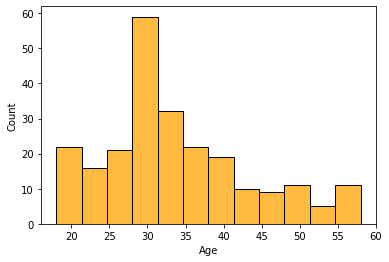

In [40]:
sns.histplot(quit_df.Age, color = 'orange')

We see that a big portion of people that have quit their job are under 35 years old.

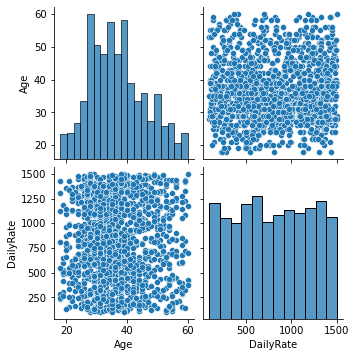

In [41]:
df_subset = employee_df[['Age', 'DailyRate']].copy()
sns.pairplot(df_subset)

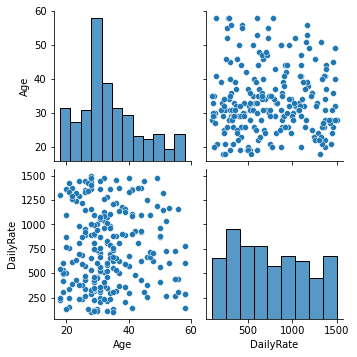

In [42]:
df_subset = quit_df[['Age', 'DailyRate']].copy()
sns.pairplot(df_subset)

In [43]:
quit_df['DailyRate'].mean()

###From thee ones that quit, nearly half of them

750.3628691983122

In [44]:
not_quit_df = employee_df[employee_df.Attrition == 0]
not_quit_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
2,49,0,1,279,1,8,1,Life Sciences,3,1,...,4,4,1,10,3,3,10,7,1,7
5,33,0,1,1392,1,3,4,Life Sciences,4,0,...,3,3,0,8,3,3,8,7,3,0
7,27,0,0,591,1,2,1,Medical,1,1,...,3,4,1,6,3,3,2,2,2,2
8,32,0,1,1005,1,2,2,Life Sciences,4,1,...,3,3,0,8,2,2,7,7,3,6
10,59,0,0,1324,1,3,3,Medical,3,0,...,4,1,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,1,884,1,23,2,Medical,3,1,...,3,3,1,17,3,3,5,2,0,3
2062,39,0,0,613,1,6,1,Medical,4,1,...,3,1,1,9,5,3,7,7,1,7
2064,27,0,0,155,1,4,3,Life Sciences,2,1,...,4,2,1,6,0,3,6,2,0,3


<AxesSubplot:>

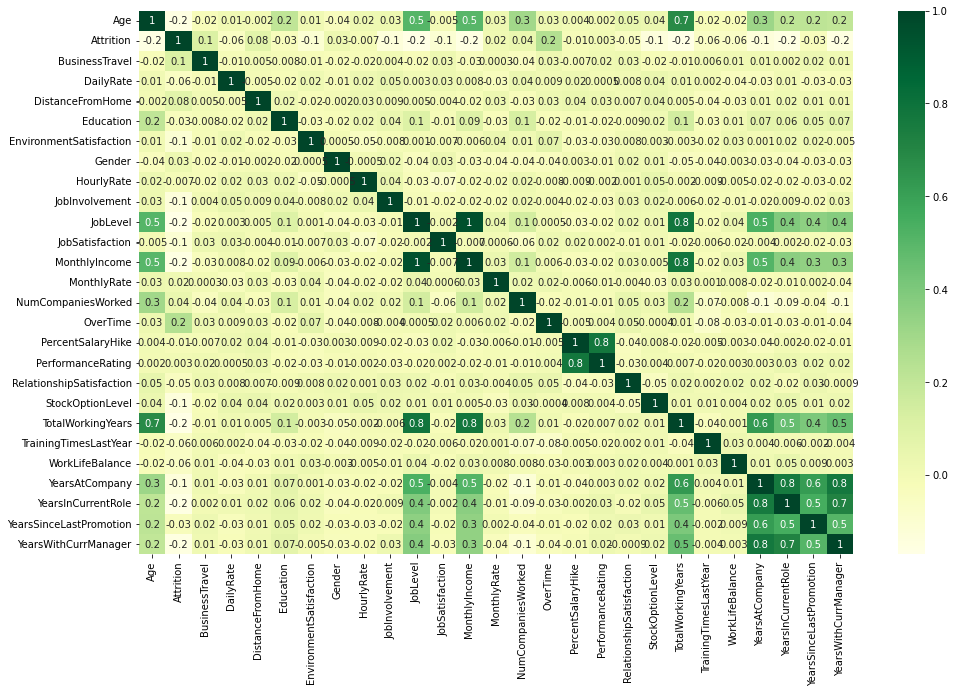

In [45]:
df_corr = employee_df.corr(method = 'pearson')
figure = plt.figure(figsize = (16, 10))
sns.heatmap(df_corr, cmap = 'YlGn',annot = True, fmt = '.1g')

Chosing variables for cluster: from the correlation map, althouighj there are no variables with high correelation with the target variable, we choose to analyse clusters on the following features:

- Age
- Education
- Monthly income
- Totalworking years
- Worklife balance

### Quitting Cluster

In [46]:
clus_quit_df = quit_df[['Age', 'Education', 'MonthlyIncome', 'TotalWorkingYears', 'WorkLifeBalance']].copy()
clus_quit_df

,Age,Education,MonthlyIncome,TotalWorkingYears,WorkLifeBalance
EmployeeNumber,,,,,
1,41,2,5993,8,1
4,37,2,2090,7,3
19,28,3,2028,6,3
27,36,4,3407,10,3
31,34,1,2960,8,3
...,...,...,...,...,...
2023,23,3,1790,1,2
2027,29,4,4787,4,4
2032,56,2,2339,14,1


In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [48]:
scaled_clus_quit_df = MinMaxScaler().fit_transform(clus_quit_df)
scaled_clus_quit_df

array([[0.575     , 0.25      , 0.26440318, 0.2       , 0.        ],
       [0.475     , 0.25      , 0.05734748, 0.175     , 0.66666667],
       [0.25      , 0.5       , 0.05405836, 0.15      , 0.66666667],
       ...,
       [0.95      , 0.25      , 0.07055703, 0.35      , 0.        ],
       [0.8       , 0.75      , 0.30339523, 0.3       , 0.66666667],
       [0.8       , 0.5       , 0.52228117, 0.5       , 0.66666667]])

In [49]:
cols = clus_quit_df.columns
#index = df_v2.index
scaled_clus_quit_df = pd.DataFrame(scaled_clus_quit_df, columns = cols)
scaled_clus_quit_df

,Age,Education,MonthlyIncome,TotalWorkingYears,WorkLifeBalance
0,0.575,0.25,0.264403,0.200,0.000000
1,0.475,0.25,0.057347,0.175,0.666667
2,0.250,0.50,0.054058,0.150,0.666667
3,0.450,0.75,0.127215,0.250,0.666667
4,0.400,0.00,0.103501,0.200,0.666667
...,...,...,...,...,...
232,0.125,0.50,0.041432,0.025,0.333333
233,0.275,0.75,0.200424,0.100,1.000000
234,0.950,0.25,0.070557,0.350,0.000000
235,0.800,0.75,0.303395,0.300,0.666667


In [50]:
ks = range(1, 11) # loop between 1 and 10
inertias = [] # also called sum of squared errors (difference between the points of the data and the centroid)

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(scaled_clus_quit_df)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

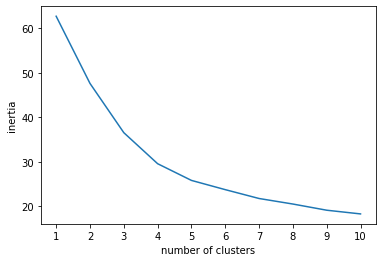

In [51]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

In [52]:
model_k4 = KMeans(n_clusters = 4, random_state = 0)
scaled_clus_quit_df_k4 = scaled_clus_quit_df.copy() # copy the prod dataset in order to join the label column to the original one
model_k4.fit(scaled_clus_quit_df_k4)

KMeans(n_clusters=4, random_state=0)

In [53]:
clus_quit_df['label'] = model_k4.labels_
clus_quit_df

,Age,Education,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,label
EmployeeNumber,,,,,,
1,41,2,5993,8,1,2
4,37,2,2090,7,3,1
19,28,3,2028,6,3,3
27,36,4,3407,10,3,3
31,34,1,2960,8,3,1
...,...,...,...,...,...,...
2023,23,3,1790,1,2,2
2027,29,4,4787,4,4,3
2032,56,2,2339,14,1,2


In [54]:
clus_quit_df.groupby(['label']).mean().transpose()

label,0,1,2,3
Age,48.818182,27.021277,31.970149,30.443038
Education,2.977273,1.425532,3.104478,3.379747
MonthlyIncome,9347.772727,3761.319149,3925.626866,3587.848101
TotalWorkingYears,17.386364,5.553191,7.000000,5.810127
WorkLifeBalance,2.795455,3.085106,1.641791,3.189873


In [55]:
clus_quit_df['label'].value_counts()

3    79
2    67
1    47
0    44
Name: label, dtype: int64

There are four diferent types of people quiting.

1 - Older employees with really high salaries - probably retired

2 - Lower education, lower working years, good worklife balance

3 - High education, worst Work life balance

4 - higher education, lower salaries - apostar nesta em proximos passos


### Not Quitting Cluster

In [56]:
clus_not_quit_df = not_quit_df[['Age', 'Education', 'MonthlyIncome', 'TotalWorkingYears', 'WorkLifeBalance']].copy()
clus_not_quit_df

,Age,Education,MonthlyIncome,TotalWorkingYears,WorkLifeBalance
EmployeeNumber,,,,,
2,49,1,5130,10,3
5,33,4,2909,8,3
7,27,1,3468,6,3
8,32,2,3068,8,2
10,59,3,2670,12,2
...,...,...,...,...,...
2061,36,2,2571,17,3
2062,39,1,9991,9,3
2064,27,3,6142,6,3


In [57]:
scaled_clus_not_quit_df = MinMaxScaler().fit_transform(clus_not_quit_df)
scaled_clus_not_quit_df

array([[0.73809524, 0.        , 0.21527338, 0.26315789, 0.66666667],
       [0.35714286, 0.75      , 0.09805784, 0.21052632, 0.66666667],
       [0.21428571, 0.        , 0.12755964, 0.15789474, 0.66666667],
       ...,
       [0.21428571, 0.5       , 0.26868271, 0.15789474, 0.66666667],
       [0.73809524, 0.5       , 0.22899514, 0.44736842, 0.33333333],
       [0.38095238, 0.5       , 0.17695799, 0.15789474, 1.        ]])

In [58]:
cols = clus_not_quit_df.columns
#index = df_v2.index
scaled_clus_not_quit_df = pd.DataFrame(scaled_clus_not_quit_df, columns = cols)
scaled_clus_not_quit_df

,Age,Education,MonthlyIncome,TotalWorkingYears,WorkLifeBalance
0,0.738095,0.00,0.215273,0.263158,0.666667
1,0.357143,0.75,0.098058,0.210526,0.666667
2,0.214286,0.00,0.127560,0.157895,0.666667
3,0.333333,0.25,0.106449,0.210526,0.333333
4,0.976190,0.50,0.085444,0.315789,0.333333
...,...,...,...,...,...
1228,0.428571,0.25,0.080220,0.447368,0.666667
1229,0.500000,0.00,0.471818,0.236842,0.666667
1230,0.214286,0.50,0.268683,0.157895,0.666667
1231,0.738095,0.50,0.228995,0.447368,0.333333


In [59]:
ks = range(1, 11) # loop between 1 and 10
inertias = [] # also called sum of squared errors (difference between the points of the data and the centroid)

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(scaled_clus_not_quit_df)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

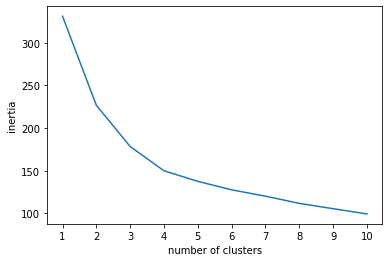

In [60]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

In [61]:
scaled_clus_not_quit_df_k4 = scaled_clus_not_quit_df.copy() # copy the prod dataset in order to join the label column to the original one
model_k4.fit(scaled_clus_not_quit_df_k4)

KMeans(n_clusters=4, random_state=0)

In [62]:
clus_not_quit_df['label'] = model_k4.labels_
clus_not_quit_df

,Age,Education,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,label
EmployeeNumber,,,,,,
2,49,1,5130,10,3,3
5,33,4,2909,8,3,0
7,27,1,3468,6,3,3
8,32,2,3068,8,2,3
10,59,3,2670,12,2,1
...,...,...,...,...,...,...
2061,36,2,2571,17,3,3
2062,39,1,9991,9,3,3
2064,27,3,6142,6,3,0


In [63]:
clus_not_quit_df.groupby(['label']).mean().transpose()

label,0,1,2,3
Age,36.036072,37.185022,47.897196,32.901024
Education,3.523046,3.189427,3.093458,1.587031
MonthlyIncome,5072.723447,5122.929515,15494.514019,4828.491468
TotalWorkingYears,9.324649,9.814978,25.144860,8.071672
WorkLifeBalance,3.140281,1.788546,2.827103,2.904437


In [64]:
clus_not_quit_df['label'].value_counts()

0    499
3    293
1    227
2    214
Name: label, dtype: int64

### Principal Component Analysis - Dimensionality Reduction

In [65]:
employee_df.Department.value_counts()

1    961
2    446
3     63
Name: Department, dtype: int64

In [66]:
employee_df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

## Data Partition



In [67]:
employee_df_model = employee_df.drop(['EducationField', 'JobRole'], axis = 1)

In [68]:
#employee_df_model = employee_df.drop('JobRole', axis = 1)

In [69]:
X = employee_df_model.drop('Attrition', axis = 1) # drop the target variable
y = employee_df_model['Attrition']

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.15, random_state = 0 \
                                                   ,stratify = y, shuffle = True)

## ML Models

### Decision Tree

In [71]:
employee_df_model

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1,0,1102,2,1,2,2,0,94,...,3,1,0,8,0,1,6,4,0,5
2,49,0,1,279,1,8,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
4,37,1,0,1373,1,2,2,4,1,92,...,3,2,0,7,3,3,0,0,0,0
5,33,0,1,1392,1,3,4,4,0,56,...,3,3,0,8,3,3,8,7,3,0
7,27,0,0,591,1,2,1,1,1,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,1,884,1,23,2,3,1,41,...,3,3,1,17,3,3,5,2,0,3
2062,39,0,0,613,1,6,1,4,1,42,...,3,1,1,9,5,3,7,7,1,7
2064,27,0,0,155,1,4,3,2,1,87,...,4,2,1,6,0,3,6,2,0,3


In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score

model_dt = DecisionTreeClassifier()
#no of features
nof_list=np.arange(1, 30)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model_dt = DecisionTreeClassifier()
    rfe = RFE(model_dt, n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_val_rfe = rfe.transform(X_val)
    model_dt.fit(X_train_rfe,y_train)
    
    score = model_dt.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 27
Score with 27 features: 0.809955


In [76]:
from sklearn.model_selection import StratifiedKFold
def compare_models(X, y, model):
    # apply StratifiedK-Fold
    skf = StratifiedKFold(n_splits = 10)
    score_train = []
    score_val = []
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        
        # Apply model
        model.fit(X_train, y_train)
        predictions_train = model.predict(X_train)
        predictions_val = model.predict(X_val)
        score_train.append(f1_score(y_train, predictions_train))
        score_val.append(f1_score(y_val, predictions_val))

    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)

    return str(avg_train) + '+/-' + str(std_train),str(avg_val) + '+/-' + str(std_val)

print('Decision Tree F1 scores:', compare_models(X_train, y_train, model_dt)) #Decision tree 


Decision Tree F1 scores: ('1.0+/-0.0', '0.318+/-0.1')


### Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier


#no of features
nof_list = np.arange(1, 30)            
high_score = 0
#Variable to store the optimum features
nof = 0           
score_list = []
for n in range(len(nof_list)):
    model_rf = RandomForestClassifier()
    rfe = RFE(model_rf, n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_val_rfe = rfe.transform(X_val)
    model_rf.fit(X_train_rfe,y_train)
    
    score = model_rf.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 21
Score with 21 features: 0.864253


In [77]:
print('Decision Tree F1 scores:', compare_models(X_train, y_train, model_rf)) #Decision tree 

Decision Tree F1 scores: ('1.0+/-0.0', '0.286+/-0.1')
